((54.38915546144744, 45.637920287744286), (71.49016262773088, 92.6225513270397))


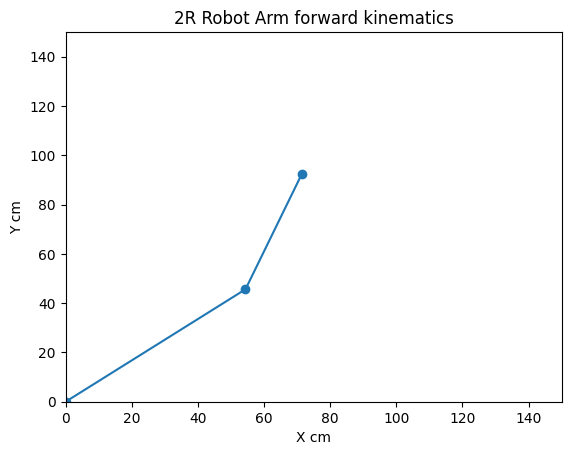

In [5]:
# forward kinematics for 2-joint planar robot arm
# femur lenghth = 71.0 cm
# tibia lenghth = 50.0 cm
# rotated by 40 then 30 degrees

import numpy as np
import math
import matplotlib.pyplot as plt

def forward_kinematics(joint_angles):
    femur_lenghth = 71.0
    tibia_lenghth = 50.0

    # define rotation angles in radians
    theta1 = math.radians(joint_angles[0]) # 40 degrees
    theta2 = math.radians(joint_angles[1]) # 30 degrees

    cos_theta1 = math.cos(theta1) # cos 40
    sin_theta1 = math.sin(theta1) # sin 40
    cos_theta2 = math.cos(theta2)
    sin_theta2 = math.sin(theta2)

    # since there's two rotation, we need to declare two transformation matrix
    trans_matrix_theta1 = np.array([[cos_theta1, -sin_theta1, 0], 
                                [sin_theta1,  cos_theta1, 0],
                                [0,           0,          1]])

    trans_matrix_theta2 = np.array([[cos_theta2, -sin_theta2, 0],
                                [sin_theta2,  cos_theta2, 0],
                                [0,           0,          1]])


    #define translation matrix for femur and tibia (already 3x3)
    trans_femur = np.array([[math.cos(theta1), -math.sin(theta1), femur_lenghth * math.cos(theta1)],
                            [math.sin(theta1), math.cos(theta1), femur_lenghth * math.sin(theta1)],
                            [0, 0, 1]])
    
    trans_tibia = np.array([[math.cos(theta2), -math.sin(theta2), tibia_lenghth * math.cos(theta2)],
                            [math.sin(theta2), math.cos(theta2),  tibia_lenghth* math.sin(theta2)],
                            [0, 0, 1]])
    
    # compute the final transformation matrix
    final_trans = np.dot(trans_femur, trans_tibia)

    # calculate the end-effector cartesian
    end_pos = np.dot(final_trans, np.array([0, 0, 1])) # 0,0,1 is the end effector in homogenous 

    # biar bisa diplot harus diextract per titik jointnya
    x1 = femur_lenghth * math.cos(theta1)
    y1 = femur_lenghth * math.sin(theta1)
    x2 = end_pos[0]
    y2 = end_pos[1]

    return (x1, y1), (x2, y2)


# show output vector on grapgh

def plot_arm(joint_angles):
    (x1, y1), (x2, y2)= forward_kinematics(joint_angles)

    # initiate the plot at origin
    plt.plot([0, x1, x2], [0, y1, y2], marker='o')
    plt.xlim(0, 150)
    plt.ylim(0, 150)
    plt.xlabel('X cm')
    plt.ylabel('Y cm')
    plt.title('2R Robot Arm forward kinematics')
    plt.show()

final_coord = forward_kinematics([40, 30])
print(final_coord)
plot_arm([40, 30])

**INVERSE KINEMATICS**

 Given a desired location for the tip of the robotic arm, what should the angles of the joints be so as to locate the tip of the arm at the desired location. There is usually more than one solution and can at times be a difficult problem to solve.

 pokoknya nyari theta!!!

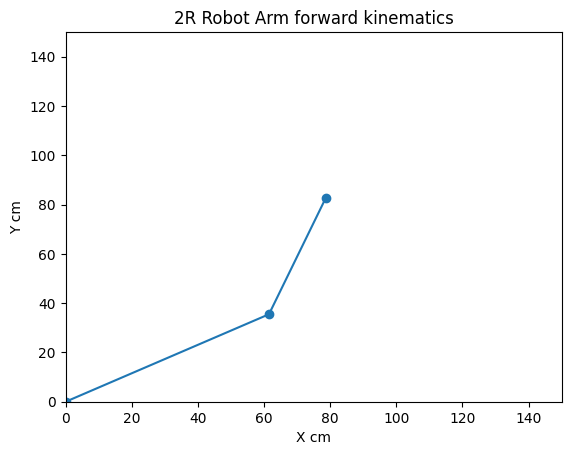

Femur angle: 30.000000000000004 degrees
Tibia angle: 39.99999999999999 degrees


In [9]:
# INVERSE KINEMATICS
femur_length = 71.0
tibia_length = 50.0

def inverse_kinematics(x,y):
    # find the r distance from origin to the end effector
    r = math.sqrt(x**2 + y**2)
    # then use the law of cosines (cos) to find the angles between the links for the femur 
    # while for tibia, we use atan2 to find the angle
    femur_theta = math.acos((r**2 - femur_length**2 - tibia_length**2) / (2 * tibia_length * femur_length))
    tibia_theta = math.atan2(y, x) - math.atan2((tibia_length * math.sin(femur_theta)), (femur_length +tibia_length * math.cos(femur_theta)))
    return math.degrees(femur_theta), math.degrees(tibia_theta)

def show_inv_output(femur_angle, tibia_angle):
    # show on graph the output of inverse kinematics and its number
    plot_arm([femur_angle, tibia_angle])
    print(f"Femur angle: {femur_angle} degrees")
    print(f"Tibia angle: {tibia_angle} degrees")
    plt.show()

# test inverse kinematics by inputting final coordinates
inverse_input = input("Enter the end effector coordinates as x, y: ")
x, y= map(float, inverse_input.split(','))
femur_angle, tibia_angle = inverse_kinematics(x,y)
show_inv_output(femur_angle, tibia_angle)



**3D SPACES**

![alt text](image.png)

![alt text](image-1.png)

[[ 0.76604444 -0.64278761  0.        ]
 [ 0.64278761  0.76604444  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.8660254 -0.5        0.       ]
 [ 0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]


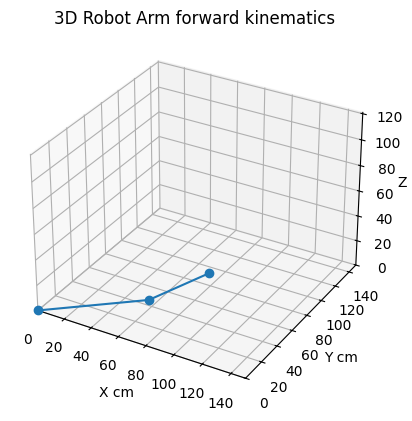

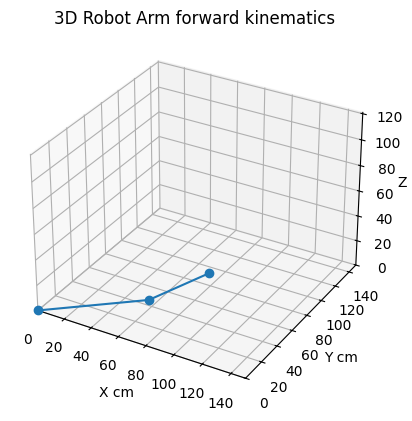

In [ ]:
# we need to compute the roll, pitch, yaw component for each rotation matrix

def rotation_matrix(roll, pitch, yaw):
    # each joint has 3 rotation component 
    # femur = rz1 * ry1 * rx1
    # tibia = rz2 *ry2 *rx2

    #define rotation degree in radians
    x, y, z = math.radians(roll), math.radians(pitch), math.radians(yaw)

    rx = np.array([[1, 0, 0],
                   [0, math.cos(x), -math.sin(x)],
                   [0, math.sin(x), math.cos(x)]])
    
    ry = np.array([[math.cos(y), 0, math.sin(y)],
                   [0, 1, 0],
                   [-math.sin(y), 0, math.cos(y)]])
    
    rz = np.array([[math.cos(z), -math.sin(z), 0],
                   [math.sin(z), math.cos(z), 0],
                   [0, 0, 1]])
    
    r = rz @ ry @ rx # matrix multiplication
    print(r) # still in 3x3 form

    # since rotation is not commutative, order matters
    return r # for each rotation matrix theta1 and theta2

# define homoegnous transformtaion for each joint
def homogen_transf(rotation_matrix, tx, ty, tz):
    # create 4x4 matrix
    h = np.array([[rotation_matrix[0,0], rotation_matrix[0,1], rotation_matrix[0,2], tx],
                  [rotation_matrix[1,0], rotation_matrix[1,1], rotation_matrix[1,2], ty],
                  [rotation_matrix[2,0], rotation_matrix[2,1], rotation_matrix[2,2], tz],
                  [0, 0, 0, 1]])
    return h

# get rotation matrix for each theta
theta_1 = input("Enter roll, pitch, yaw for femur : ")
theta_2 = input("Enter roll, pitch, yaw for tibia : ")
roll1, pitch1, yaw1 = map(float, theta_1.split(','))
roll2, pitch2, yaw2 = map(float, theta_2.split(','))

# get lenght of each link
femur_length = input("Enter femur lenght: ")
tibia_length = input("Enter tibia lenght: ")
femur_length = float(femur_length)
tibia_length = float(tibia_length)

rot_theta1 = rotation_matrix(roll1, pitch1, yaw1)
rot_theta2 = rotation_matrix(roll2, pitch2, yaw2)

# compute transformation matrix of each joint and initiate position vector
trans_theta1 = homogen_transf(rot_theta1, 0, 0, 0)
trans_theta2 = homogen_transf(rot_theta2, femur_length, 0, 0)

# overall transformation
trans_total = trans_theta1 @ trans_theta2

origin = np.array([0, 0, 0, 1]) # initialize poistion vector
femur_final = trans_theta1 @ np.array([femur_length, 0, 0, 1]) # calculate femur end position
tibia_final = trans_total @ np.array([tibia_length, 0, 0, 1]) # use trans_total to calculate tibia end position since its connected to femur

# plot in 3d space with matplotlib
def plot_3d():
    # extract coordinates
    x_cart = [origin[0], femur_final[0], tibia_final[0]]
    y_cart = [origin[1], femur_final[1], tibia_final[1]]
    z_cart = [origin[2], femur_final[2], tibia_final[2]]

    # define the vecto lenght for each link
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x_cart, y_cart, z_cart, marker='o')
    # set limit
    limit = femur_length + tibia_length
    ax.set_xlim([-limit, limit])
    ax.set_ylim([-limit, limit])
    ax.set_zlim([0, limit])
    ax.set_xlabel('X cm')
    ax.set_ylabel('Y cm')
    ax.set_zlabel('Z cm')
    ax.set_title('3D Robot Arm forward kinematics')
    plt.xlim(0, 150)
    plt.ylim(0,150)
    plt.show()

    return fig 

plot_3d()
# print final positions
print("Femur end position:", femur_final)
print("Tibia end position:", tibia_final)

    

**FORWARD AND INVERSE KINEMATICS**